In [1]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd, sklearn
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (14, 5)

[&larr; Back to Index](index.html)

# Spectral Features

For classification, we're going to be using new features in our arsenal: spectral moments (centroid, bandwidth, skewness, kurtosis) and other spectral statistics.

[*Moments*](https://en.wikipedia.org/wiki/Moment_(mathematics) is a term used in physics and statistics. There are raw moments and central moments. 

You are probably already familiar with two examples of moments: mean and variance. The first raw moment is known as the mean. The second central moment is known as the variance.

## Spectral Centroid

Load an audio file:

In [2]:
x, sr = librosa.load('audio/simple_loop.wav')
ipd.Audio(x, rate=sr)

The **spectral centroid** ([Wikipedia](https://en.wikipedia.org/wiki/Spectral_centroid)) indicates at which frequency the energy of a spectrum is centered upon. This is like a weighted mean:

$$ f_c = \frac{\sum_k S(k) f(k)}{\sum_k S(k)} $$

where $S(k)$ is the spectral magnitude at frequency bin $k$, $f(k)$ is the frequency at bin $k$.

[`librosa.feature.spectral_centroid`](https://librosa.github.io/librosa/generated/librosa.feature.spectral_centroid.html#librosa.feature.spectral_centroid) computes the spectral centroid for each frame in a signal:

In [3]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(97,)

Compute the time variable for visualization:

In [4]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

Define a helper function to normalize the spectral centroid for visualization:

In [5]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Plot the spectral centroid along with the waveform:

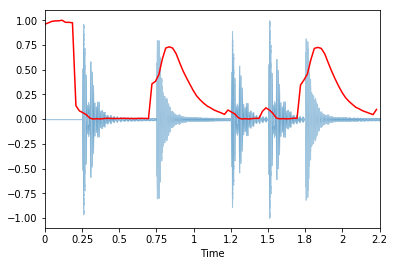

In [6]:
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r') # normalize for visualization purposes

Similar to the zero crossing rate, there is a spurious rise in spectral centroid at the beginning of the signal. That is because the silence at the beginning has such small amplitude that high frequency components have a chance to dominate. One hack around this is to add a small constant before computing the spectral centroid, thus shifting the centroid toward zero at quiet portions:

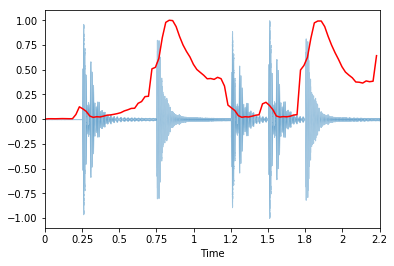

In [7]:
spectral_centroids = librosa.feature.spectral_centroid(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r') # normalize for visualization purposes

## Spectral Bandwidth

[`librosa.feature.spectral_bandwidth`](https://librosa.github.io/librosa/generated/librosa.feature.spectral_bandwidth.html#librosa.feature.spectral_bandwidth) computes the order-$p$ spectral bandwidth:

$$ \left( \sum_k S(k) \left(f(k) - f_c \right)^p \right)^{\frac{1}{p}} $$

where $S(k)$ is the spectral magnitude at frequency bin $k$, $f(k)$ is the frequency at bin $k$, and $f_c$ is the spectral centroid. When $p = 2$, this is like a weighted standard deviation.

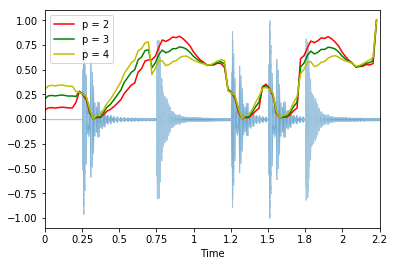

In [8]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

## Spectral Contrast

**Spectral contrast** considers the spectral peak, the spectral valley, and their difference in each frequency subband. For more information:

- [Jiang, Dan-Ning, Lie Lu, Hong-Jiang Zhang, Jian-Hua Tao, and Lian-Hong Cai. “Music type classification by spectral contrast feature.” In Multimedia and Expo, 2002. ICME‘02. Proceedings. 2002 IEEE International Conference on, vol. 1, pp. 113-116. IEEE, 2002.](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.583.7201&rep=rep1&type=pdf)

[`librosa.feature.spectral_contrast`](https://librosa.github.io/librosa/generated/librosa.feature.spectral_contrast.html) computes the spectral contrast for six subbands for each time frame:

In [9]:
spectral_contrast = librosa.feature.spectral_contrast(x, sr=sr)
spectral_contrast.shape

(7, 97)

Display:

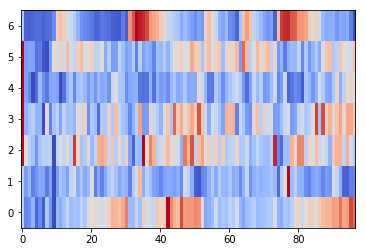

In [10]:
plt.imshow(normalize(spectral_contrast, axis=1), aspect='auto', origin='lower', cmap='coolwarm')

## Spectral Rolloff

**Spectral rolloff** is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.

$$\sum_{n=1}^{SR(t)}|M(t,n)|^2 = n* \sum_{n=1}^{N}|M(t,n)|^2$$

[`librosa.feature.spectral_rolloff`](https://librosa.github.io/librosa/generated/librosa.feature.spectral_rolloff.html#librosa.feature.spectral_rolloff) computes the rolloff frequency for each frame in a signal:

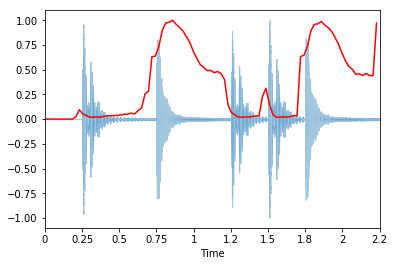

In [11]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

[&larr; Back to Index](index.html)